In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Read city data file and remove duplicates

city_data_df = pd.read_csv ("city_data.csv")
city_data_df = city_data_df.drop_duplicates('city')
city_data_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [122]:
#Read ride data file
ride_data_df = pd.read_csv("ride_data.csv")
ride_data_df.head()



,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [123]:
#Get the average fare per city
average_fare = pyber_data.groupby("city")["fare"].mean()
average_fare



city
Alvarezhaven            23.928710
Alyssaberg              20.609615
Anitamouth              37.315556
Antoniomouth            23.625000
Aprilchester            21.981579
Arnoldview              25.106452
Campbellport            33.711333
Carrollbury             36.606000
Carrollfort             25.395517
Clarkstad               31.051667
Conwaymouth             34.591818
Davidtown               22.978095
Davistown               21.497200
East Cherylfurt         31.416154
East Douglas            26.169091
East Erin               24.478214
East Jenniferchester    32.599474
East Leslie             33.660909
East Stephen            39.053000
East Troybury           33.244286
Edwardsbury             26.876667
Erikport                30.043750
Eriktown                25.478947
Floresberg              32.310000
Fosterside              23.034583
Hernandezshire          32.002222
Horneland               21.482500
Jacksonfort             32.006667
Jacobfort               24.779355
Jasonfort

In [124]:
#Get total rides per city
total_rides = pyber_data.groupby("city")["ride_id"].count()
total_rides


city
Alvarezhaven            31
Alyssaberg              26
Anitamouth               9
Antoniomouth            22
Aprilchester            19
Arnoldview              31
Campbellport            15
Carrollbury             10
Carrollfort             29
Clarkstad               12
Conwaymouth             11
Davidtown               21
Davistown               25
East Cherylfurt         13
East Douglas            22
East Erin               28
East Jenniferchester    19
East Leslie             11
East Stephen            10
East Troybury            7
Edwardsbury             27
Erikport                 8
Eriktown                19
Floresberg              10
Fosterside              24
Hernandezshire           9
Horneland                4
Jacksonfort              6
Jacobfort               31
Jasonfort               12
                        ..
South Roy               22
South Shannonborough    15
Spencertown             26
Stevensport              5
Stewartview             30
Swansonbury            

In [125]:
#Get total number of drivers per city
total_drivers = city_data_df.groupby("city")["driver_count"].mean()
total_drivers

city
Alvarezhaven            21
Alyssaberg              67
Anitamouth              16
Antoniomouth            21
Aprilchester            49
Arnoldview              41
Campbellport            26
Carrollbury              4
Carrollfort             55
Clarkstad               21
Conwaymouth             18
Davidtown               73
Davistown               25
East Cherylfurt          9
East Douglas            12
East Erin               43
East Jenniferchester    22
East Leslie              9
East Stephen             6
East Troybury            3
Edwardsbury             11
Erikport                 3
Eriktown                15
Floresberg               7
Fosterside              69
Hernandezshire          10
Horneland                8
Jacksonfort              6
Jacobfort               52
Jasonfort               25
                        ..
South Roy               35
South Shannonborough     9
Spencertown             68
Stevensport              6
Stewartview             49
Swansonbury            

In [126]:

#Get total number of cities per type
city_type  = city_data_df.set_index('city')['type']


city_type.value_counts()

Urban       66
Suburban    41
Rural       18
Name: type, dtype: int64

In [127]:
#Get rides per city by merging the city data file and the ride data file
pyber_data = pd.merge(city_data_df, ride_data_df, on="city")
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [128]:
#get Average Fare ($) Per City, Total Number of Rides Per City, Total Number of Drivers Per City, City Type (Urban, Suburban, Rural)

pyber_cities = pd.DataFrame({"Average Fare per City":average_fare,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type
})
pyber_cities.head()

,Average Fare per City,City Type,Number of Drivers,Number of Rides
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


In [129]:
#Urban
urban = pyber_cities.loc[pyber_cities["City Type"]== "Urban"]

#suburban
suburban = pyber_cities.loc[pyber_cities["City Type"]== "Suburban"]

#rural
rural = pyber_cities.loc[pyber_cities["City Type"]== "Rural"]

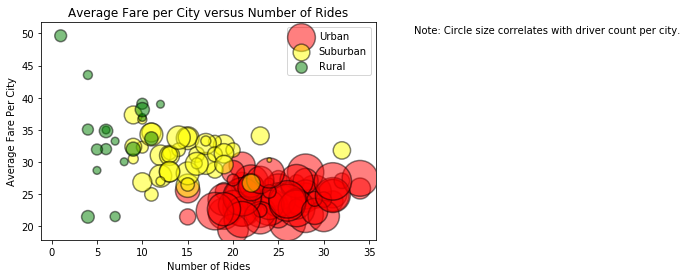

In [141]:
#Urban
plt.scatter(urban["Number of Rides"], urban["Average Fare per City"], color = "red", edgecolors="black", s = urban["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)

#Suburban
plt.scatter(suburban["Number of Rides"], suburban["Average Fare per City"], color = "yellow", edgecolors ="black", s = suburban["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)

#Rural
plt.scatter(rural["Number of Rides"], rural["Average Fare per City"], color = "green", edgecolors = "black", s = rural["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")

#Add the legend.
plt.legend(loc= "upper right")

#Show plot.
plt.show()

In [132]:

#Sum of fares by city type.

city_fare_pie = pyber_data.groupby(["type"])["fare"].sum()
city_fare_pie


type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

In [133]:
#Use the City Pie index for wedge labels.

city_fare_pie.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')

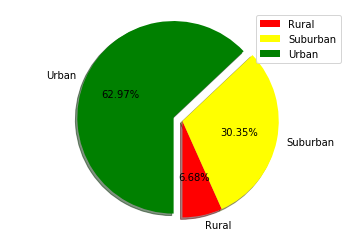

In [134]:
#Set the colors of each section of the pie chart.
colors = ["red", "yellow", "green"]

#Only explode the third section of the pie chart.

explode = (0,0, 0.1)

#Create the pie chart.
plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 270)

#Tell Matplotlib that we want a pie chart with equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()

In [135]:
#Total rides by city type.

city_rides_pie = pyber_data.groupby(["type"])["ride_id"].count()
city_rides_pie

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

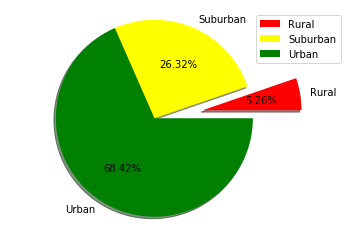

In [136]:
#Use the City Pie index for wedge labels.
city_rides_pie.index

#Set the colors of each section of the pie chart.
colors = ["red", "yellow", "green"]

#Only explode the first section of the pie chart.
explode = (0.5,0,0)

#Create the pie chart.
plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we wnat the pie chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the chart.
plt.show()


In [137]:
#Total driver count.

city_drivers_pie = pyber_data.groupby(["type"])["driver_count"].mean()
city_drivers_pie

type
Rural        5.816000
Suburban    15.414400
Urban       39.692923
Name: driver_count, dtype: float64

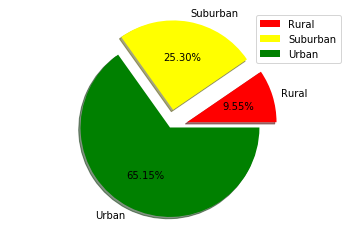

In [138]:
#Use the City Pie index for the wedge labels.
city_drivers_pie.index

#Set the colors of each section of the pie chart.
colors = ["red", "yellow", "green"]

#explode the first and second segments of the pie chart.

explode = (0.2,0.2,0)

#Create the pie chart.
plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True)

#Tell Matplotlib that we want the chart to have equal axes.
plt.axis("equal")

#Add the legend.
plt.legend(loc = "upper right")

#Show the pie chart.
plt.show()